In [2]:
from spice.models.binary import Binary, add_orbit, evaluate_orbit_at_times
from spice.models.mesh_model import IcosphereModel
from spice.models.mesh_view import get_mesh_view
import matplotlib.pyplot as plt
import numpy as np
import astropy.units as u
from spice.spectrum import simulate_observed_flux
from transformer_payne import TransformerPayne, METALS
import jax.numpy as jnp
%matplotlib inline

from tqdm import tqdm

# TZ Fornacis Binary System Simulation

This notebook demonstrates the simulation of the TZ Fornacis binary star system using the SPICE (Stellar Physics Interactive Computational Environment) framework. TZ Fornacis is a well-studied eclipsing binary system consisting of a G8III primary and an A5V secondary star with an orbital period of approximately 75.6 days. The system parameters are adapted from [Gallenne et al, 2016](https://www.aanda.org/articles/aa/full_html/2016/02/aa26764-15/aa26764-15.html).

In this notebook, we will:
1. Set up the binary system with realistic stellar parameters
2. Calculate the orbital dynamics over time
3. Generate synthetic spectra and light curves for the system

The simulation uses the Transformer Payne model for stellar atmospheres and an icosphere mesh to represent the stellar surfaces.

In [3]:
tp = TransformerPayne.download()

Since calculating the orbit for a binary requires significant memory allocation, we are performing the calculation in chunks like so:

In [4]:
body1 = IcosphereModel.construct(500, 8.28, 2.057, tp.to_parameters(dict(logteff=jnp.log10(4930), logg=2.91)), tp.stellar_parameter_names)
body2 = IcosphereModel.construct(500, 3.94, 1.958, tp.to_parameters(dict(logteff=jnp.log10(6650), logg=3.35)), tp.stellar_parameter_names)
binary = Binary.from_bodies(body1, body2)
binary = add_orbit(binary, (75.6*u.d).to(u.year).value, 0., 0., jnp.deg2rad(85.68), jnp.deg2rad(65.99), jnp.deg2rad(269.), 0., 0., 0., 15)
times = jnp.linspace(0., (75.6*u.d).to(u.year).value, 150).reshape((10, 15))
result = [evaluate_orbit_at_times(binary, t) for t in tqdm(times)]

  0%|                                                                                                                                         | 0/10 [00:00<?, ?it/s]

Using search radius factor for KD-tree: 2.2243297


 10%|████████████▉                                                                                                                    | 1/10 [00:23<03:28, 23.12s/it]

Using search radius factor for KD-tree: 2.2243297


 20%|█████████████████████████▊                                                                                                       | 2/10 [00:29<01:44, 13.09s/it]

Using search radius factor for KD-tree: 2.2243297


 30%|██████████████████████████████████████▋                                                                                          | 3/10 [00:35<01:09,  9.89s/it]

Using search radius factor for KD-tree: 2.2243297


 40%|███████████████████████████████████████████████████▌                                                                             | 4/10 [00:41<00:50,  8.38s/it]

Using search radius factor for KD-tree: 2.2243297


 50%|████████████████████████████████████████████████████████████████▌                                                                | 5/10 [00:47<00:37,  7.54s/it]

Using search radius factor for KD-tree: 2.2243297


 60%|█████████████████████████████████████████████████████████████████████████████▍                                                   | 6/10 [00:53<00:28,  7.04s/it]

Using search radius factor for KD-tree: 2.2243297


 70%|██████████████████████████████████████████████████████████████████████████████████████████▎                                      | 7/10 [00:59<00:20,  6.72s/it]

Using search radius factor for KD-tree: 2.2243297


 80%|███████████████████████████████████████████████████████████████████████████████████████████████████████▏                         | 8/10 [01:05<00:13,  6.51s/it]

Using search radius factor for KD-tree: 2.2243297


 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████             | 9/10 [01:11<00:06,  6.37s/it]

Using search radius factor for KD-tree: 2.2243297


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [01:17<00:00,  7.77s/it]


Let's flatten out the results:

In [8]:
times = times.flatten()

pb1, pb2 = [], []
for r in result:
    pb1.extend(r[0])
    pb2.extend(r[1])

In [6]:
# from spice.plots.plot_mesh import animate_binary
# animate_binary(pb1, pb2, "tz_fornacis_orbit.gif", property="los_velocities", 
#               timestamps=times*365.25, timestamp_label="days", scale_radius=10)

# animate_binary(pb1, pb2, "tz_fornacis_orbit_visibilities.gif", property="visible_cast_areas", 
#               timestamps=times*365.25, timestamp_label="days", scale_radius=10)

In [7]:
# TODO: try a much narrower wavelengths band!!!
# + plot both spectra of the two companions, AND their sum on top of it

In [ ]:
from tqdm import tqdm

vws = jnp.linspace(3000, 10000, 40000)
spectra_body1 = [simulate_observed_flux(tp.intensity, _pb, jnp.log10(vws), wavelengths_chunk_size=4000) for _pb in tqdm(pb1)]
spectra_body2 = [simulate_observed_flux(tp.intensity, _pb, jnp.log10(vws), wavelengths_chunk_size=4000) for _pb in tqdm(pb2)]

  0%|                                                                                                                                        | 0/150 [00:00<?, ?it/s]/home/100/mj8805/scr/mj8805/miniconda3/envs/astro/lib/python3.12/site-packages/jax/_src/linear_util.py:370: UserWarning: Explicitly requested dtype <class 'jax.numpy.float64'> requested in logspace is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/jax-ml/jax#current-gotchas for more.
  ans = _fun(*args, **kwargs)
/home/100/mj8805/scr/mj8805/miniconda3/envs/astro/lib/python3.12/site-packages/jax/_src/numpy/array_methods.py:122: UserWarning: Explicitly requested dtype float64 requested in astype is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://g

In [ ]:
import pickle
import os

# Create a directory for saving data if it doesn't exist
os.makedirs('data', exist_ok=True)

# Save the spectra data to pickle files
with open('data/tz_fornacis_spectra_body1.pkl', 'wb') as f:
    pickle.dump(spectra_body1, f)
    
with open('data/tz_fornacis_spectra_body2.pkl', 'wb') as f:
    pickle.dump(spectra_body2, f)

print("Spectra data saved to pickle files in the 'data' directory")


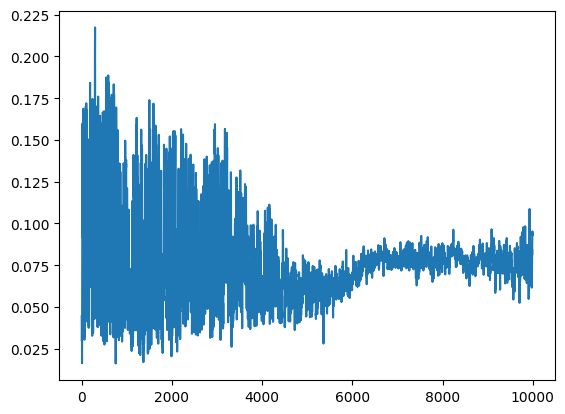

In [18]:
plt.plot(spectra_body1[1][:, 0])

In [19]:
from spice.spectrum import AB_passband_luminosity
from spice.spectrum.filter import GaiaG, GaiaBP, GaiaRP, Bolometric

bol = Bolometric()
gaia_g = GaiaG()
gaia_bp = GaiaBP()
gaia_rp = GaiaRP()


bol_lum = [AB_passband_luminosity(bol, vws, _spec1[:, 0]+_spec2[:, 0]) for _spec1, _spec2 in zip(spectra_body1, spectra_body2)]
gaia_g_lum = [AB_passband_luminosity(gaia_g, vws, _spec1[:, 0]+_spec2[:, 0]) for _spec1, _spec2 in zip(spectra_body1, spectra_body2)]
gaia_bp_lum = [AB_passband_luminosity(gaia_bp, vws, _spec1[:, 0]+_spec2[:, 0]) for _spec1, _spec2 in zip(spectra_body1, spectra_body2)]
gaia_rp_lum = [AB_passband_luminosity(gaia_rp, vws, _spec1[:, 0]+_spec2[:, 0]) for _spec1, _spec2 in zip(spectra_body1, spectra_body2)]

In [20]:
bol_lum = np.array(bol_lum)
gaia_g_lum = np.array(gaia_g_lum)
gaia_bp_lum = np.array(gaia_bp_lum)
gaia_rp_lum = np.array(gaia_rp_lum)

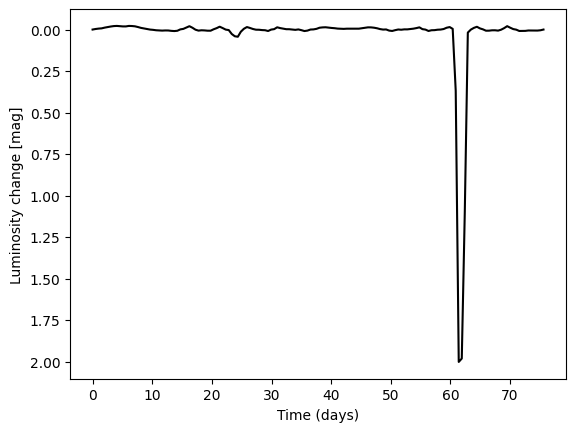

In [16]:
plt.plot(times*365.25, bol_lum-bol_lum[0], color='black');
plt.gca().invert_yaxis();
plt.gca().set_xlabel("Time (days)");
plt.ylabel('Luminosity change [mag]');

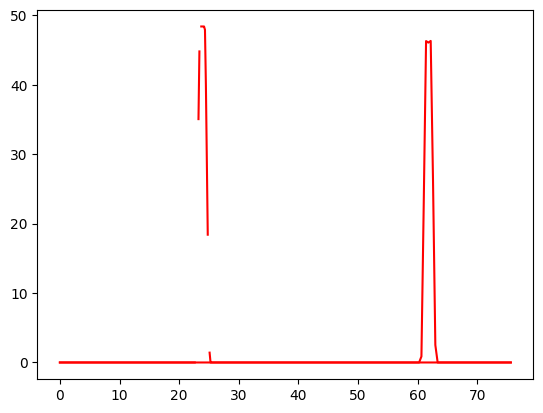

In [50]:
plt.plot(times*365.25, [np.sum(r.occluded_areas) for r in pb1], color='red');
plt.plot(times*365.25, [np.sum(r.occluded_areas) for r in pb2], color='red');

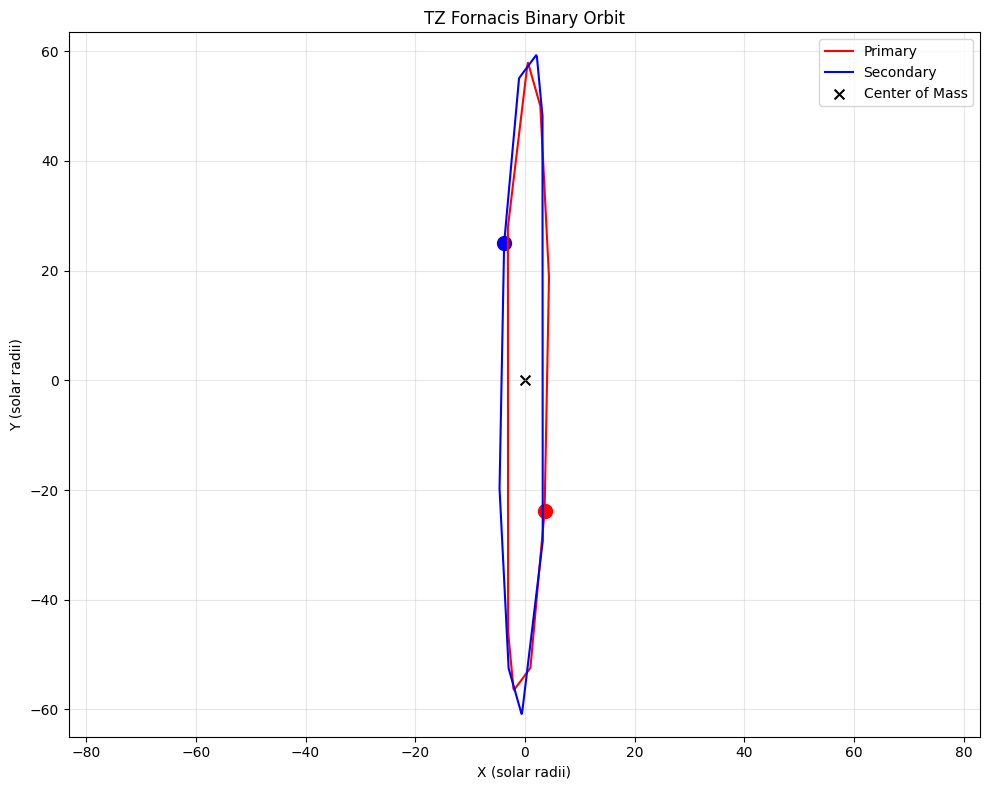

In [46]:
# Plot the orbit of the binary system
plt.figure(figsize=(10, 8))

# Extract positions from the meshes
primary_positions = np.array([mesh.center for mesh in pb1])
secondary_positions = np.array([mesh.center for mesh in pb2])

# Plot the orbits
plt.plot(primary_positions[:, 0], primary_positions[:, 1], 'r-', label='Primary')
plt.plot(secondary_positions[:, 0], secondary_positions[:, 1], 'b-', label='Secondary')

# Mark the starting positions
plt.scatter(primary_positions[0, 0], primary_positions[0, 1], c='r', s=100, marker='o')
plt.scatter(secondary_positions[0, 0], secondary_positions[0, 1], c='b', s=100, marker='o')

# Add center of mass
plt.scatter(0, 0, c='black', s=50, marker='x', label='Center of Mass')

# Set equal aspect ratio to ensure circular orbits appear circular
plt.axis('equal')
plt.grid(True, alpha=0.3)
plt.xlabel('X (solar radii)')
plt.ylabel('Y (solar radii)')
plt.title('TZ Fornacis Binary Orbit')
plt.legend()
plt.tight_layout()


In [11]:
import pickle
import os

# Create a dictionary with all the data we want to save
data_to_save = {
    'times': times,
    'primary_meshes': pb1,
    'secondary_meshes': pb2,
    'wavelengths': vws,
    'primary_spectra': spectra_body1,
    'secondary_spectra': spectra_body2,
    'bolometric_luminosity': bol_lum,
    'gaia_g_luminosity': gaia_g_lum,
    'gaia_bp_luminosity': gaia_bp_lum,
    'gaia_rp_luminosity': gaia_rp_lum
}

# Define the output filename
output_file = "tz_fornacis_data_correct.pkl"

# Save the data to a pickle file
with open(output_file, 'wb') as f:
    pickle.dump(data_to_save, f)

print(f"Data saved to {os.path.abspath(output_file)}")


Data saved to /home/100/mj8805/tz_fornacis_data_correct.pkl
